In [160]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [161]:
df_raw_data = pd.read_csv('COVID19_line_list_data.csv')
df_raw_data.columns

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [162]:
#selecting only columns of interest
df = df_raw_data[['id','country','gender','age','death']]
df = df[df['age'].notna()]
df = df[df['gender'].notna()]

In [163]:
#data is not curated. field must be converted to binary
df.death.unique()

array(['0', '1', '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/23/2020', '2/24/2020', '2/22/2020', '2/25/2020',
       '02/01/20'], dtype=object)

In [164]:
#apply mask and convert to 1 if death value is any other than 0.
mask = df['death'] != '0'
df['death'][mask] = '1'


In [165]:
#data is not curated. field must be converted to binary
df.gender.unique()
#df['gender'].fillna('0', inplace=True)


array(['male', 'female'], dtype=object)

In [166]:
mask = df['gender'] == 'male'
df['gender'][mask] = '1'

mask = df['gender'] == 'female'
df['gender'][mask] = '2'



C:\Users\CAS233\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [167]:
#sanity check summary of records
#df.groupby('death').nunique()
df.gender.unique()


array(['1', '2'], dtype=object)

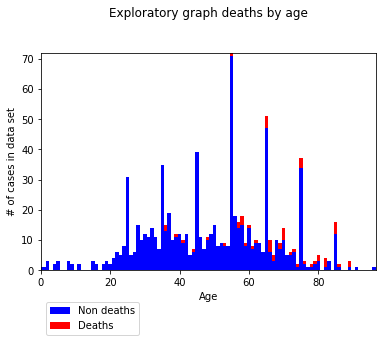

In [168]:
#pivot dataframe
pivoted = pd.pivot_table(df, values='id', index=['age'], columns=['death'], aggfunc='count')
#pivoted = pivoted.dropna()
pivoted = pivoted.reset_index()

###Next blocks prepare the plot based on pivoted dataframe.
#prepare variables for graph.
t = pivoted['age'].values
a = pivoted['0'].values
b = pivoted['1'].values
#c = pivoted['articles'].values

fig, ax1 = plt.subplots()
#fig, ax1 = plt.bar('age','0')

#Two data sets that share a primary axis (in units)
color = 'black'
w = 1
ax1.set_xlabel('Age')
ax1.set_ylabel("# of cases in data set", color=color)
ax1.bar(t,a, width=w, color='blue', label='Non deaths', align='center')
ax1.bar(t,b, width=w, color='red', label='Deaths', align='center', bottom=a)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.axis([20, 100, 0, 75])
ax1.autoscale(tight=True)
#add final formating to the graph
plt.title('Exploratory graph deaths by age\n\n')
ax1.legend(loc="lower left", bbox_to_anchor=(0,-0.32))
#ax.legend(bbox_to_anchor=(1.1, 1.05))

#show final graph
plt.show()

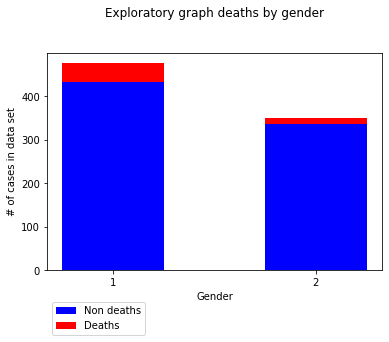

In [169]:
#pivot dataframe
pivoted = pd.pivot_table(df, values='id', index=['gender'], columns=['death'], aggfunc='count')
#pivoted = pivoted.dropna()
pivoted = pivoted.reset_index()

###Next blocks prepare the plot based on pivoted dataframe.
#prepare variables for graph.
t = pivoted['gender'].values
a = pivoted['0'].values
b = pivoted['1'].values
#c = pivoted['articles'].values

fig, ax1 = plt.subplots()
#fig, ax1 = plt.bar('age','0')

#Two data sets that share a primary axis (in units)
color = 'black'
w = 0.5
ax1.set_xlabel('Gender')
ax1.set_ylabel("# of cases in data set", color=color)
ax1.bar(t,a, width=w, color='blue', label='Non deaths', align='center')
ax1.bar(t,b, width=w, color='red', label='Deaths', align='center', bottom=a)
ax1.tick_params(axis='y', labelcolor=color)
#ax1.axis([20, 100, 0, 75])
#ax1.autoscale(tight=True)
#add final formating to the graph
plt.title('Exploratory graph deaths by gender\n\n')
ax1.legend(loc="lower left", bbox_to_anchor=(0,-0.32))
#ax.legend(bbox_to_anchor=(1.1, 1.05))

#show final graph
plt.show()


In [170]:
#df

In [171]:
#Select y (target variable)
y=df[['death']].copy()


In [172]:
#Select x's (features)
features = ['gender','age']

In [173]:
X = df[features].copy()


In [174]:
#set parameters to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [175]:
#Training begins
classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [176]:
predictions = classifier.predict(X_test)

In [177]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9084249084249084